# Principal Component Analysis

#### When

PCA is great if there are strong linear dependencies among the features. 

PCA makes new features which are linearly independent. PC1 captures most of the variance in the data, after that PC2 etc.

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def Accuracy(y_test, y_pred):
    acc = np.sum(y_test == y_pred)/len(y_test)
    return acc

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
pca = PCA(2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72229951 0.2397406 ]


In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


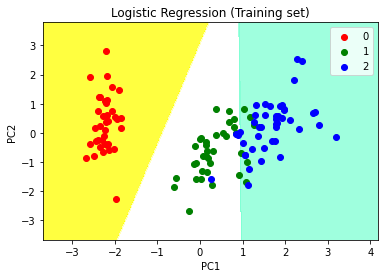

In [7]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
 
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


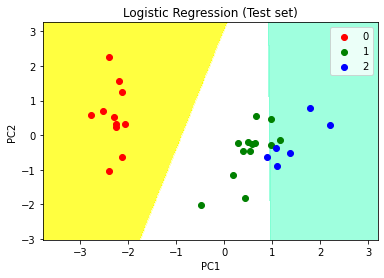

In [8]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

In [9]:
Accuracy(y_test, y_pred)

0.8666666666666667

#### Accuracy for different number of PC's used

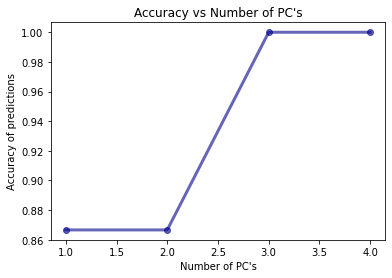

In [10]:
x_vals = []
y_vals = []
for idx in range(1, np.shape(X)[1]+1):
    x_vals.append(idx)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Scale the features
    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pca = PCA(idx)

    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_vals.append(Accuracy(y_test, y_pred))
    
plt.plot(x_vals, y_vals, 'bo-', color="darkblue", alpha=0.6, linewidth=3)
plt.xlabel("Number of PC's")
plt.ylabel('Accuracy of predictions')
plt.title("Accuracy vs Number of PC's")
plt.show()

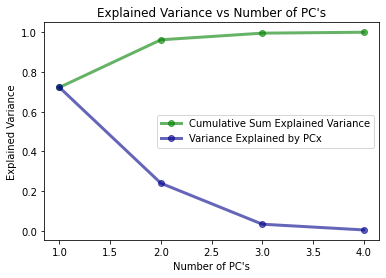

In [11]:
explained_variance = pca.explained_variance_ratio_
cs_ex_var = np.cumsum(explained_variance)
plt.plot(x_vals, cs_ex_var, 'bo-', color="green", alpha=0.6, linewidth=3, label="Cumulative Sum Explained Variance")
plt.plot(x_vals, explained_variance, 'bo-', color="darkblue", alpha=0.6, linewidth=3, label="Variance Explained by PCx")
plt.xlabel("Number of PC's")
plt.ylabel('Explained Variance')
plt.title("Explained Variance vs Number of PC's")
plt.legend()
plt.show()

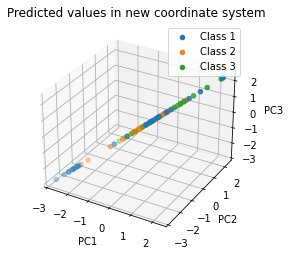

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pca = PCA(3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ax10 = ax20 = ax30 = []
ax11 = ax21 = ax31 = []
ax12 = ax22 = ax32 = []

for i in range(len(y_pred)):
    a, b, c = X_test[i]
    
    if y_pred[i] == 0:
        ax10.append(a)
        ax20.append(b)
        ax30.append(c)
    
    elif y_pred[i] == 1:
        ax11.append(a)
        ax21.append(b)
        ax31.append(c)
        
    else:
        ax12.append(a)
        ax22.append(b)
        ax32.append(c)

ax.scatter(xs = ax10, ys = ax20, zs = ax30, label="Class 1")
ax.scatter(xs = ax11, ys = ax21, zs = ax31, label="Class 2")
ax.scatter(xs = ax12, ys = ax22, zs = ax32, label="Class 3")

ax.set_title("Predicted values in new coordinate system")

ax.set_xlabel("PC1")

ax.set_ylabel("PC2")

ax.set_zlabel("PC3")

ax.legend(loc="best")

plt.show()

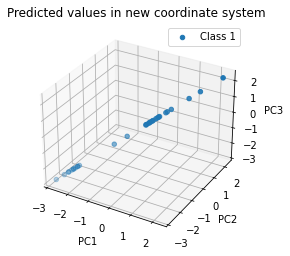

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = ax10, ys = ax20, zs = ax30, label="Class 1")

ax.set_title("Predicted values in new coordinate system")

ax.set_xlabel("PC1")

ax.set_ylabel("PC2")

ax.set_zlabel("PC3")

ax.legend(loc="best")

plt.show()

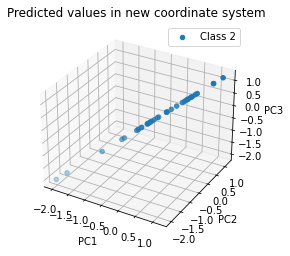

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = ax11, ys = ax21, zs = ax31, label="Class 2")

ax.set_title("Predicted values in new coordinate system")

ax.set_xlabel("PC1")

ax.set_ylabel("PC2")

ax.set_zlabel("PC3")

ax.legend(loc="best")

plt.show()

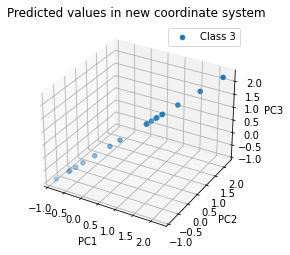

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = ax12, ys = ax22, zs = ax32, label="Class 3")

ax.set_title("Predicted values in new coordinate system")

ax.set_xlabel("PC1")

ax.set_ylabel("PC2")

ax.set_zlabel("PC3")

ax.legend(loc="best")

plt.show()